In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

import os
from tensorflow.keras.models import load_model

In [ ]:
train_dir = '/content/drive/MyDrive/dataset_kentang/dataset_augmented/train'
validation_dir = '/content/drive/MyDrive/dataset_kentang/dataset_augmented/validation'
test_dir = '/content/drive/MyDrive/dataset_kentang/dataset_augmented/test'

In [ ]:
urutan_folder = ['blackspot_bruising', 'healthy_potato', 'brown_rot', 'dry_rot', 'soft_rot']

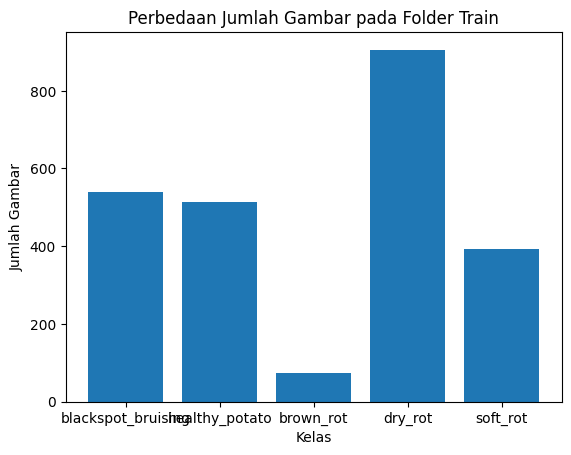

In [ ]:
folder_paths = ['/content/drive/MyDrive/dataset_kentang/dataset_augmented/train/blackspot_bruising',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/train/healthy_potato',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/train/brown_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/train/dry_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/train/soft_rot']

# Inisialisasi list untuk menyimpan jumlah gambar di setiap folder
jumlah_gambar = []

# Loop melalui setiap folder
for folder_path in folder_paths:
    # Hitung jumlah file gambar dalam folder
    jumlah_file = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg'))])

    # Tambahkan jumlah file ke list
    jumlah_gambar.append(jumlah_file)

# Buat diagram batang
plt.bar(urutan_folder, jumlah_gambar)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Perbedaan Jumlah Gambar pada Folder Train')
plt.show()

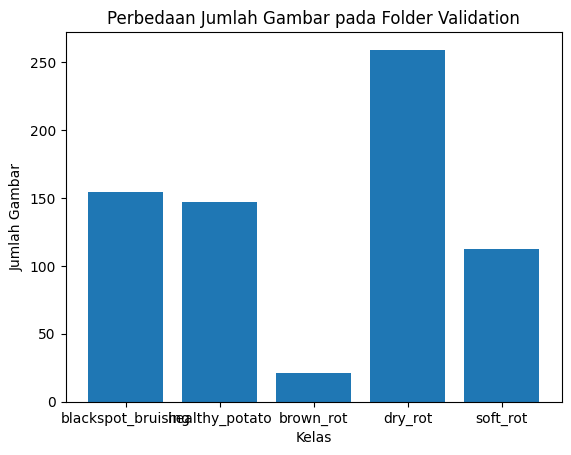

In [ ]:
folder_paths = ['/content/drive/MyDrive/dataset_kentang/dataset_augmented/validation/blackspot_bruising',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/validation/healthy_potato',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/validation/brown_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/validation/dry_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/validation/soft_rot']

# Inisialisasi list untuk menyimpan jumlah gambar di setiap folder
jumlah_gambar = []

# Loop melalui setiap folder
for folder_path in folder_paths:
    # Hitung jumlah file gambar dalam folder
    jumlah_file = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg'))])

    # Tambahkan jumlah file ke list
    jumlah_gambar.append(jumlah_file)

# Buat diagram batang
plt.bar(urutan_folder, jumlah_gambar)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Perbedaan Jumlah Gambar pada Folder Validation')
plt.show()

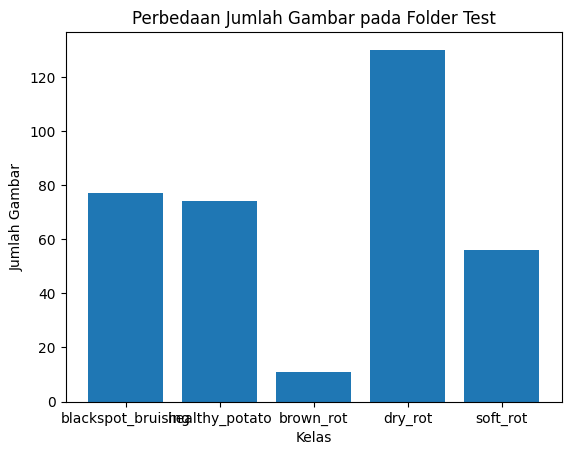

In [ ]:
folder_paths = ['/content/drive/MyDrive/dataset_kentang/dataset_augmented/test/blackspot_bruising',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/test/healthy_potato',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/test/brown_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/test/dry_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented/test/soft_rot']

# Inisialisasi list untuk menyimpan jumlah gambar di setiap folder
jumlah_gambar = []

# Loop melalui setiap folder
for folder_path in folder_paths:
    # Hitung jumlah file gambar dalam folder
    jumlah_file = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg'))])

    # Tambahkan jumlah file ke list
    jumlah_gambar.append(jumlah_file)

# Buat diagram batang
plt.bar(urutan_folder, jumlah_gambar)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Perbedaan Jumlah Gambar pada Folder Test')
plt.show()

In [ ]:
preprocessing_dataset = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = preprocessing_dataset.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 2424 images belonging to 5 classes.


In [ ]:
validation_generator = preprocessing_dataset.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 693 images belonging to 5 classes.


In [ ]:
test_generator = preprocessing_dataset.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 348 images belonging to 5 classes.


In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    pooling=max,
    input_shape=(224, 224, 3)
    )

for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 66489413 (253.64 MB)
Trainable params: 64231429 (245.02 MB)
Non-trainable params: 2257984 (8.61 MB)
________

In [ ]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
38/38 [==============================] - 1096s 29s/step - loss: 10.4133 - accuracy: 0.6716 - val_loss: 0.9745 - val_accuracy: 0.8745
Epoch 2/10
38/38 [==============================] - 18s 478ms/step - loss: 0.5075 - accuracy: 0.8750 - val_loss: 0.4051 - val_accuracy: 0.8975
Epoch 3/10
38/38 [==============================] - 20s 520ms/step - loss: 0.1971 - accuracy: 0.9348 - val_loss: 0.3229 - val_accuracy: 0.9076
Epoch 4/10
38/38 [==============================] - 18s 480ms/step - loss: 0.1194 - accuracy: 0.9625 - val_loss: 0.2442 - val_accuracy: 0.9322
Epoch 5/10
38/38 [==============================] - 18s 480ms/step - loss: 0.0981 - accuracy: 0.9662 - val_loss: 0.3242 - val_accuracy: 0.9163
Epoch 6/10
38/38 [==============================] - 20s 524ms/step - loss: 0.0639 - accuracy: 0.9736 - val_loss: 0.2375 - val_accuracy: 0.9293
Epoch 7/10
38/38 [==============================] - 18s 466ms/step - loss: 0.0425 - accuracy: 0.9860 - val_loss: 0.2434 - val_accuracy: 0.929

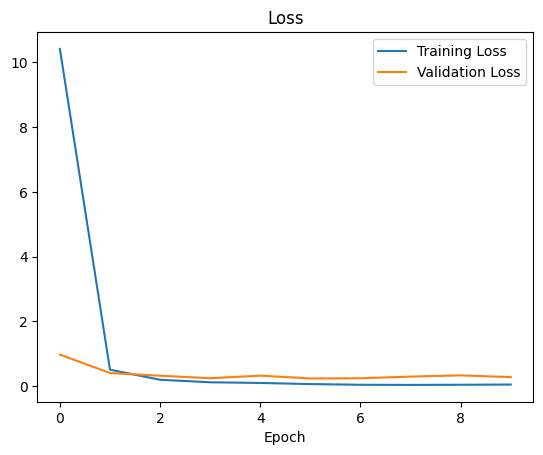

In [ ]:
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

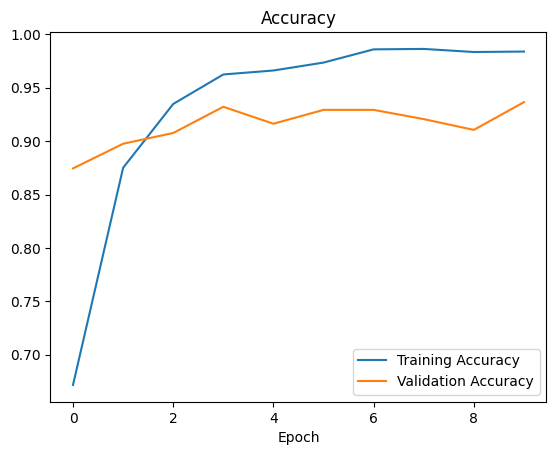

In [ ]:
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
save_directory = '/content/drive/MyDrive/dataset_kentang/model_mobilenetv2/'
model.save(save_directory + 'mobilenetv2_dataset_augmented.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('/content/drive/MyDrive/dataset_kentang/model_mobilenetv2/mobilenetv2_dataset_augmented.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 66489413 (253.64 MB)
Trainable params: 64231429 (245.02 MB)
Non-trainable params: 2257984 (8.61 MB)
________

In [ ]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
urutan_folder = ['blackspot_bruising', 'healthy_potato', 'brown_rot', 'dry_rot', 'soft_rot']

6/6 [==============================] - 121s 24s/step


In [ ]:
class_report = classification_report(true_labels, predicted_classes, target_names=urutan_folder)
print("Classification Report:\n", class_report)

Classification Report:
                     precision    recall  f1-score   support

blackspot_bruising       0.88      0.88      0.88        77
    healthy_potato       0.91      0.91      0.91        11
         brown_rot       0.87      0.94      0.90       130
           dry_rot       0.99      1.00      0.99        74
          soft_rot       0.84      0.68      0.75        56

          accuracy                           0.90       348
         macro avg       0.90      0.88      0.89       348
      weighted avg       0.90      0.90      0.89       348

